# DAT210x - Programming with Python for DS

## Module6- Lab4

This code is intentionally missing! Read the directions on the course lab page!

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np 
import time
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
C = 1
kernel = 'linear'
iterations = 5000   # TODO: Change to 200000 once you get to Question#2
#
# INFO: You can set this to false if you want to
# draw the full square matrix
FAST_DRAW = True

In [3]:
def drawPlots(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
  # INFO: A convenience function for you
  # You can use this to break any higher-dimensional space down
  # And view cross sections of it.

  # If this line throws an error, use plt.style.use('ggplot') instead
    mpl.style.use('ggplot') # Look Pretty

    padding = 3
    resolution = 0.5
    max_2d_score = 0
    y_colors = ['#ff0000', '#00ff00', '#0000ff']
    my_cmap = mpl.colors.ListedColormap(['#ffaaaa', '#aaffaa', '#aaaaff'])
    colors = [y_colors[i] for i in y_train]
    num_columns = len(X_train.columns)

    fig = plt.figure()
    fig.set_tight_layout(True)
    fig.canvas.set_window_title(wintitle)
  
    cnt = 0
    for col in range(num_columns):
        for row in range(num_columns):
      # Easy out
            if FAST_DRAW and col > row:
                cnt += 1
                continue
            ax = plt.subplot(num_columns, num_columns, cnt + 1)
            plt.xticks(())
            plt.yticks(())

      # Intersection:
            if col == row:
                plt.text(0.5, 0.5, X_train.columns[row], verticalalignment='center', horizontalalignment='center', fontsize=12)
                cnt += 1
                continue


      # Only select two features to display, then train the model
            X_train_bag = X_train.ix[:, [row,col]]
            X_test_bag = X_test.ix[:, [row,col]]
            model.fit(X_train_bag, y_train)

      # Create a mesh to plot in
            x_min, x_max = X_train_bag.ix[:, 0].min() - padding, X_train_bag.ix[:, 0].max() + padding
            y_min, y_max = X_train_bag.ix[:, 1].min() - padding, X_train_bag.ix[:, 1].max() + padding
            xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                           np.arange(y_min, y_max, resolution))

      # Plot Boundaries
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())

      # Prepare the contour
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=my_cmap, alpha=0.8)
            plt.scatter(X_train_bag.ix[:, 0], X_train_bag.ix[:, 1], c=colors, alpha=0.5)


            score = round(model.score(X_test_bag, y_test) * 100, 3)
            plt.text(0.5, 0, "Score: {0}".format(score), transform = ax.transAxes, horizontalalignment='center', fontsize=8)
            max_2d_score = score if score > max_2d_score else max_2d_score

            cnt += 1

    print ("Max 2D Score: ", max_2d_score)
  

In [4]:
def benchmark(model, X_train, X_test, y_train, y_test, wintitle='Figure 1'):
    print ('\n\n' + wintitle + ' Results')
    s = time.time()
    for i in range(iterations):
        # TODO: train the classifier on the training data / labels:
        model.fit(X_train, y_train)
    print ("{0} Iterations Training Time: ".format(iterations), time.time() - s)


    s = time.time()
    for i in range(iterations):
      # TODO: score the classifier on the testing data / labels:
        score = model.score(X_test, y_test)
    print ("{0} Iterations Scoring Time: ".format(iterations), time.time() - s)
    print ("High-Dimensionality Score: ", round((score*100), 3))


In [5]:
# TODO: Load up the wheat dataset into dataframe 'X'
# Verify you did it properly.
# Indices shouldn't be doubled, nor weird headers...
#
X = pd.read_csv('./Datasets/wheat.data', index_col = 0)

In [6]:
# INFO: An easy way to show which rows have nans in them
print(X.isnull().any())

area           False
perimeter      False
compactness     True
length         False
width           True
asymmetry      False
groove          True
wheat_type     False
dtype: bool


In [7]:
# TODO: Go ahead and drop any row with a nan
X = X.dropna(axis =0)


In [8]:
print(X.isnull().values.sum())

0


In [9]:
# INFO: # In the future, you might try setting the nan values to the
# mean value of that column, the mean should only be calculated for
# the specific class rather than across all classes, now that you
# have the labels

# TODO: Copy the labels out of the dset into variable 'y' then Remove
# them from X. Encode the labels, using the .map() trick we showed
# you in Module 5 -- canadian:0, kama:1, and rosa:2
y = X['wheat_type']

In [10]:
print(y.unique())


['kama' 'canadian' 'rosa']


In [11]:
y = y.map({'canadian':0, 'kama':1, 'rosa':2})
X = X.drop('wheat_type', axis =1)

In [12]:
# TODO: Split your data into test / train sets
# Your test size can be 30% with random_state 7.
# Use variable names: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 7)

In [13]:
# TODO: Create an SVC classifier named svc
# Use a linear kernel, and set the C value to C
svc = SVC(C = C, kernel= kernel)



SVC Results
5000 Iterations Training Time:  4.403491735458374
5000 Iterations Scoring Time:  1.9116969108581543
High-Dimensionality Score:  86.885
Max 2D Score:  93.443


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


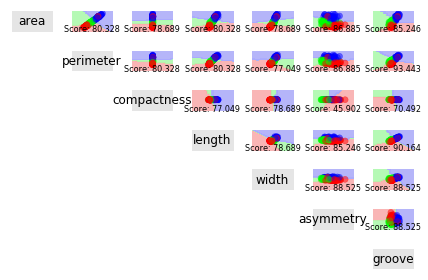

In [14]:
benchmark(svc, X_train, X_test, y_train, y_test, 'SVC')
drawPlots(svc, X_train, X_test, y_train, y_test, 'SVC')


In [15]:
# TODO: Create an KNeighbors classifier named knn
# Set the neighbor count to 5
knn = KNeighborsClassifier(n_neighbors = 5)



KNeighbors Results
5000 Iterations Training Time:  2.284695625305176
5000 Iterations Scoring Time:  5.2003772258758545
High-Dimensionality Score:  83.607
Max 2D Score:  90.164


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


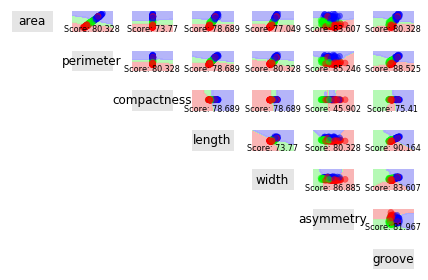

In [16]:
benchmark(knn, X_train, X_test, y_train, y_test, 'KNeighbors')
drawPlots(knn, X_train, X_test, y_train, y_test, 'KNeighbors')

In [17]:
#TODO: Adding in a Decision Tree Classifier, setting its max_depth to 9,
#and random_state=2, but not altering any other setting.
#Make sure you add in the benchmark and drawPlots call for our new classifier as well.
d_tree = DecisionTreeClassifier(max_depth =9, random_state =2)



Decision_Tree Results
5000 Iterations Training Time:  4.0613486766815186
5000 Iterations Scoring Time:  1.581721544265747
High-Dimensionality Score:  91.803
Max 2D Score:  90.164


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


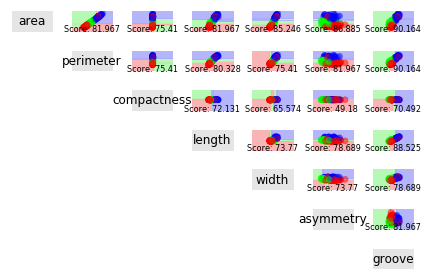

In [18]:
benchmark(d_tree, X_train, X_test, y_train, y_test, 'Decision_Tree')
drawPlots(d_tree, X_train, X_test, y_train, y_test, 'Decision_Tree')